# Objetivo do projeto

O objetivo deste projeto é desenvolver um modelo preditivo de preços de aluguéis em Nova Iorque, avaliando tal modelo utilizando as métricas que mais fazem sentido para este problema.

Para tal, é fornecido um dataset com diversas informações e preços de alguns imóveis da região de interesse.

# Importando as bibliotecas previamente instaladas

Como primeiro passo da análise, importou-se algumas das bibliotecas instaladas que serão utilizadas na resolução deste desafio, conforme o código abaixo.

In [1]:
# Libs de manipulação dos dados
import numpy as np
import pandas as pd

# Libs de visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste do estilo dos gráficos

Antes de iniciar qualquer análise, define-se aqui um estilo presente na biblioteca Seaborn para todos os gráficos deste relatório e também a cor das colunas de cada um deles, a fim de os tornar mais padronizado e esteticamente mais apresentável.

In [2]:
# estilo do grid
sns.set(style = 'darkgrid')

# cor
color = '#69b3a2'

# Carregando o dataset

Feitas as devidas importações, agora é possível carregar o dataset disponibilizado. Para tal, utilizou-se da biblioteca pandas, fazendo a leitura do arquivo csv, e salvando-o em uma variável declarada 'df', conforme segue.

In [3]:
df = pd.read_csv('../dataset/teste_indicium_precificacao.csv')

Exibindo as primeiras 5 linhas do dataset,

In [4]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Para fins de facilitar a busca das informações, copiou-se a descrição de cada uma das colunas do dataset.

id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo

nome - Representa o nome do anúncio

host_id - Representa o id do usuário que hospedou o anúncio

host_name – Contém o nome do usuário que hospedou o anúncio

bairro_group - Contém o nome do bairro onde o anúncio está localizado

bairro - Contém o nome da área onde o anúncio está localizado

latitude - Contém a latitude do local

longitude - Contém a longitude do local

room_type – Contém o tipo de espaço de cada anúncio

price - Contém o preço por noite em dólares listado pelo anfitrião

minimo_noites - Contém o número mínimo de noites que o usuário deve reservar

numero_de_reviews - Contém o número de comentários dados a cada listagem

ultima_review - Contém a data da última revisão dada à listagem

reviews_por_mes - Contém o número de avaliações fornecidas por mês

calculado_host_listings_count - Contém a quantidade de listagem por host

disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

# Análise Descritiva

Exibindo mais infos do dataset,

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

Avaliando as informações acima retornadas, o primeiro ponto a ser observado é que nem todas as colunas estão totalmente preenchidas com dados. Isto fica evidente pois temos 48894 entradas, e algumas não tem essa quantidade de dados não nulos. Outra forma de se visualizar isto é utilizando a linha de código abaixo, que irá verificar, por coluna, todas as linhas do data frame em busca de dados nulos e somar as quantidades.

In [6]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Exibindo os dados em forma de tabela, com a porcentagem de dados nulos por coluna,

In [7]:
# definindo um data frame com a quantidade de dados nulos por coluna
missing_data = (
    df.isnull()
    .sum()
    .to_frame('missing_count')
)

# adicionando ao data frame uma coluna com a quantidade de dados nulos por coluna divido pela quantidade total de dados
missing_data = missing_data.join(((df.isnull().sum())/(df.shape[0])).to_frame('missing_pct'))

# formando a coluna 'missing_pct' para exibir os resultados com duas casas decimais e no formato de porcentagem
missing_data.style.format('{:.2%}', subset = 'missing_pct')

,missing_count,missing_pct
id,0,0.00%
nome,16,0.03%
host_id,0,0.00%
host_name,21,0.04%
bairro_group,0,0.00%
bairro,0,0.00%
latitude,0,0.00%
longitude,0,0.00%
room_type,0,0.00%
price,0,0.00%


Como primeira análise, tem-se que a quantidade relativa de dados nulos das colunas 'nome' e 'host_name' são bem pequenas. Contudo, para as colunas 'ultima_review' e 'reviews_por_mes', as quantidades são relativamentes altas, com 20,56% de dados nulos em cada uma. Este ponto dos dados nulos será mais profundamente tratado na sessão de modelagem destre projeto (arquivo 'Modelling.ipynb'), pois interfere diretamente nas performances dos modelos.

Verificando agora a existência de linhas duplicadas,

In [8]:
df.duplicated().sum()

0

Portanto, não temos linhas duplicadas.

Outro ponto importante a respeito da coluna 'ultima_review' é que, segundo as informações, se trata de uma coluna com dados de datas. Contudo, estes dados estão salvos no dataset como tipo 'object', ou seja, texto. Isto fica mais claro ao exibir alguns dados desta coluna, demonstrados abaixo.

In [9]:
df['ultima_review']

0        2019-05-21
1               NaN
2        2019-07-05
3        2018-11-19
4        2019-06-22
            ...    
48889           NaN
48890           NaN
48891           NaN
48892           NaN
48893           NaN
Name: ultima_review, Length: 48894, dtype: object

Observa-se um 'dtype' como 'object', com entradas de texto '2019-05-21' e assim por diante. Portanto, se torna necessário converter estes dados para tipo data, a fim de avaliá-los de forma mais coerente. Para fazer isto, utilizou-se uma função da biblioteca pandas .to_datime, conforme demonstrado abaixo.

Obs: não foi passado o argumento 'format' dentro da função pois as strings a serem convertidas da coluna 'ultima_review' já estão no formato padrão Ano-mês-dia.

In [10]:
df['ultima_review'] = pd.to_datetime(df['ultima_review'])

In [11]:
df['ultima_review']

0       2019-05-21
1              NaT
2       2019-07-05
3       2018-11-19
4       2019-06-22
           ...    
48889          NaT
48890          NaT
48891          NaT
48892          NaT
48893          NaT
Name: ultima_review, Length: 48894, dtype: datetime64[ns]

Conforme o resultado acima, percebe-se que os dados agora estão no formato certo.

Avaliou-se na sessão seguinte os dados das colunas categóricas principais.

## Coluna 'bairro_group'

Começando pela coluna 'bairro_group', primeiro verificou-se a distribuição das diferentes 'entradas' ou respostas que ela apresenta, a partir da linha de código abaixo.

In [12]:
df['bairro_group'].value_counts()

bairro_group
Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

Uma forma também de expor este resultado seria a partir de um gráfico de barras horizontal, conforme o código a seguir. 

In [13]:
df['bairro_group'].value_counts().reset_index()

,bairro_group,count
0,Manhattan,21661
1,Brooklyn,20103
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


In [14]:
# definindo um dataframe temporário para salvar a quantidade de dados por entrada da coluna 'bairro_group'
df_bairro_group = df['bairro_group'].value_counts().reset_index()

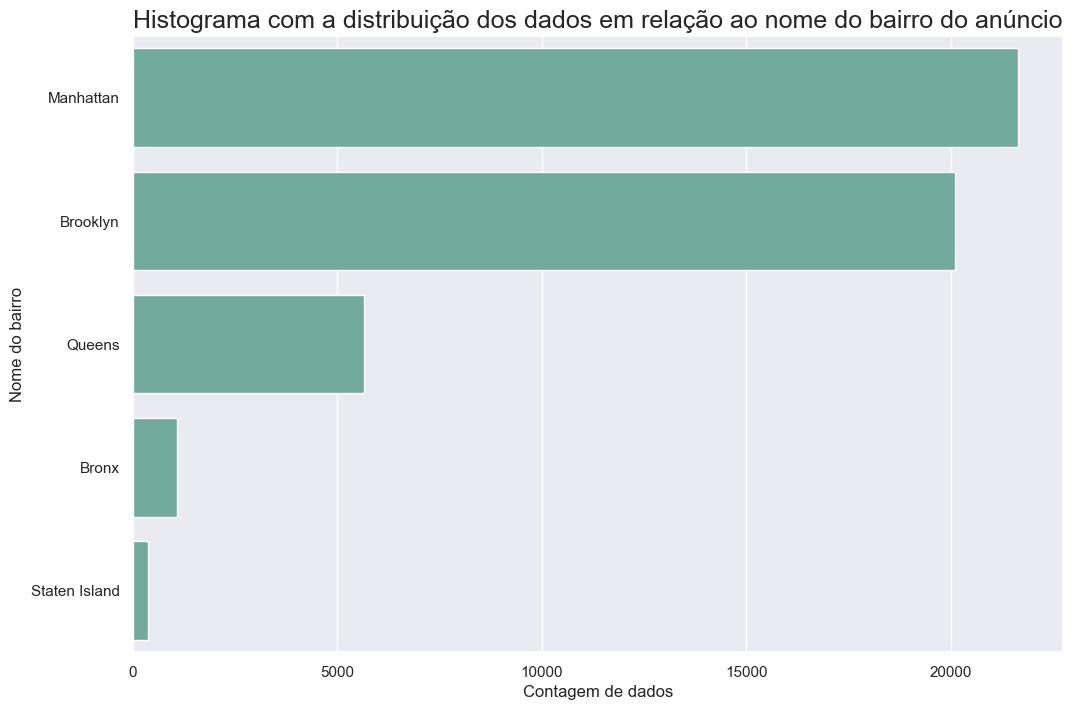

In [15]:
# ajuste do tamanho da figura
plt.figure(figsize = (12,8))

# plotando o gráfico
sns.barplot(
    data = df_bairro_group,
    y = 'bairro_group',
    x = 'count',
    color = color
)

# título do gráfico
plt.title('Histograma com a distribuição dos dados em relação ao nome do bairro do anúncio', fontsize = 18)

# nomeando o eixo Y
plt.ylabel('Nome do bairro', fontsize = 12)

# nomeando o eixo X
plt.xlabel('Contagem de dados', fontsize = 12);

Pelos resultados acima, percebe-se que a maior parte dos casos de imóveis para aluguel temporário deste dataset estão concentrados em dois bairros: Manhattan e Brooklyn, com mais de 20000 casos em cada um deles. Isto representa quase 4x mais casos que o terceiro colocado na lista, bairro Queens, seguido de longe por Bronx e Staten Island que combinados somam menos de 2000 casos.

Este resultado de certa forma condiz com a realidade da cidade, onde, segundo pesquisas, o bairro Brooklyn é o mais povoado e Manhattan é um dos bairros com maior densidade demográfica no mundo.

## Coluna 'bairro'

Avaliando agora a coluna 'bairro' onde, relembrando, mostra o nome da área em que o anúncio está localizado.

In [16]:
df['bairro'].value_counts()

bairro
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

Conforme o resultado acima, tem-se ao todo 221 áreas diferentes com anúncios de aluguel. Como existem várias com baixíssima ocorrência, optou-se por avaliar somente as áreas que representam ao menos 5% do total de anúncios. Logo, como são ao todo 48894 casos neste dataset, 5% daria algo em torno de 2444 aparições. Assim, somente os primeiros 4 resultados atendem a esta condição. Exibindo-os abaixo, temos:

In [17]:
df['bairro'].value_counts().head(4)

bairro
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Name: count, dtype: int64

Tomando-se a liberdade de pesquisar mais a respeito de cada uma dessas 4 áreas de Nova Iorque, encontra-se as seguintes características:

- Williamsburg = área descolada do Brooklyn, que atrai jovens para suas butiques, bares e restaurantes agitados;
- Bedford-Stuyvesant = bairro central de Brooklyn, possui o primeiro Centro Cultural Africano nas Américas, por conta da ascedência de sua população. Famoso por ser o cenário de algumas séries famosas ('Todo mundo odeia o Chris', por exemplo) e por algumas celebridades terem nascido por lá (Notorius Big, Jay-Z, etc.);
- Harlem = é conhecido por clubes de jazz intimistas, instituições de soul food e herança afro-americana. Possui restaurantes badalados, casas noturnas elegantes e bares descolados;
- Bushwick = também é um bairro do Brooklyn, mais conhecido por suas artes de rua, restaurantes, bares e vida noturna.

Avaliando as características gerais das áreas destacadas acima, é possível perceber algumas tendências. Além da cultura afro-americana muito forte e presente no Brooklyn, tem-se também a preferência por regiões com uma vida noturna mais agitada. Isto indica um certo nicho de imóveis voltados para pessoas mais jovens, que gostam mais de passeios noturnos a bares, restaurantes, e casas de show.

Aliado a isso, outro ponto que pode refletir o direcionamento para um grupo 'alvo' mais jovem é o preço dos aluguéis. Se a maior parte dos imóveis tiver preço de aluguel mais baixo, então seria mais atrativo para jovens, visto que geralmente pessoas jovens ainda não atingiram o seu auge financeiro, pois na maior parte das vezes estão em início de carreira. Este aspecto da distribuição dos dados de preço será discutido em sessões posteriores deste notebook.

## Coluna 'room_type'

Para a coluna 'room_type', também foi feita uma análise das possíveis diferentes entradas de dados,

In [18]:
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22325
Shared room         1160
Name: count, dtype: int64

Aqui já percebe-se um resultado bem equilibrado entre os anúncios para aluguel da casa/apartamento inteiro ou um quarto privativo. Existe ainda uma minoria representada pelo quarto compartilhado. Estes resultados reforçam ainda a ideia de que estes anúncios estão voltados para um público alvo mais jovem, visto a quantidade de quarto privativos disponíveis, podendo ser alugados por um casal, ou por pessoas que viajam sozinhas. Estas características são bem mais marcantes em hostels e demais acomodações mais baratas que recebem turistas.

Para avaliar esta ideia mais afundo, plotou-se o gráfico abaixo do tipo boxplot, expondo a relação do preço de aluguel dos imóveis com o tipo de hospedagem a ser locada.

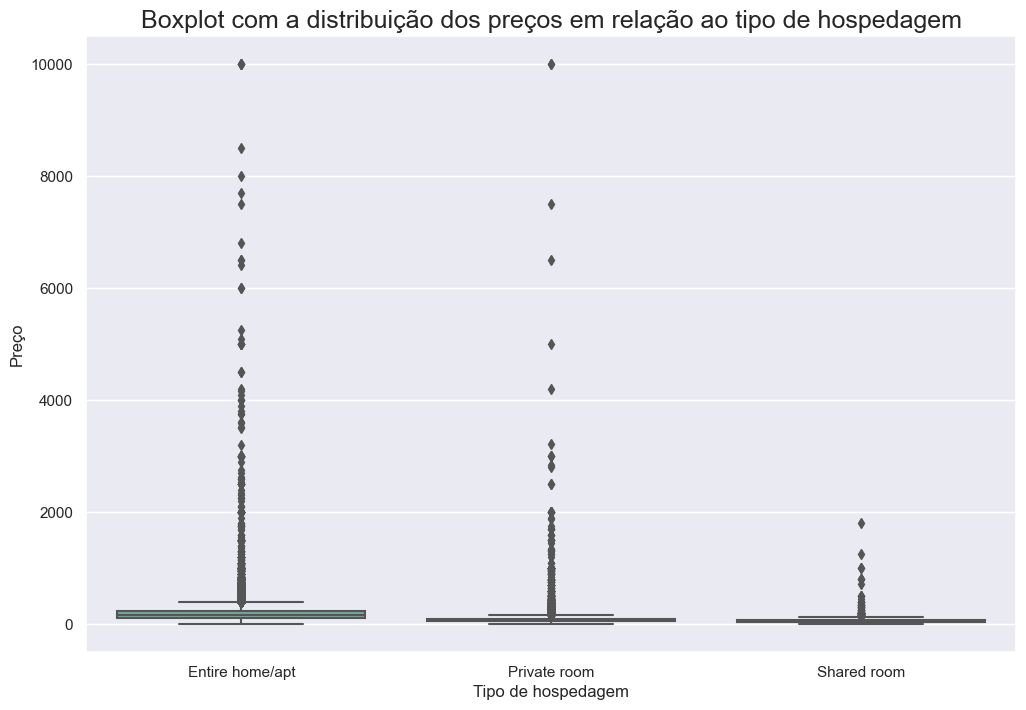

In [19]:
# ajuste do tamanho da figura
plt.figure(figsize = (12,8))

# plotando o gráfico
sns.boxplot(
    data = df,
    y = 'price',
    x = 'room_type',
    color = color
)

# título do gráfico
plt.title('Boxplot com a distribuição dos preços em relação ao tipo de hospedagem', fontsize = 18)

# nomeando o eixo Y
plt.ylabel('Preço', fontsize = 12)

# nomeando o eixo X
plt.xlabel('Tipo de hospedagem', fontsize = 12);

Observa-se no gráfico acima a presença de outliers em todos os tipos de hospedagem, com dois casos em destaque, no valor de 10.000 dólares/noite para o quarto privativo e 'entire home/apt'. Estes outliers de certa forma distorcem o gráfico, esticando muito o intervalo de preços, condensando assim as "caixas" de cada hospedagem, onde se encontram as informações valiosas de mediana, quartis, além dos valores máximo e mínimo. Portanto, a seguir restringiu-se o intervalo de dados para valores de até 2000 dólares/noite, plotando-se o gráfico novamente abaixo.

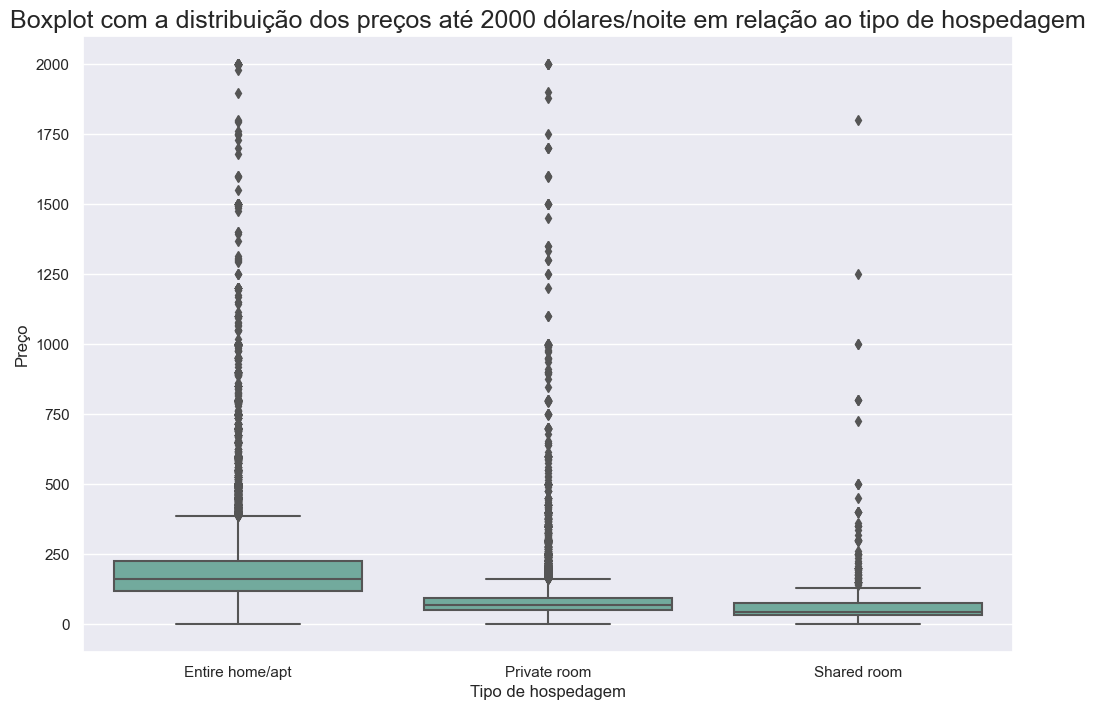

In [20]:
# ajuste do tamanho da figura
plt.figure(figsize = (12,8))

# plotando o gráfico
sns.boxplot(
    data = df[df['price']<=2000],
    y = 'price',
    x = 'room_type',
    color = color
)

# título do gráfico
plt.title('Boxplot com a distribuição dos preços até 2000 dólares/noite em relação ao tipo de hospedagem', fontsize = 18)

# nomeando o eixo Y
plt.ylabel('Preço', fontsize = 12)

# nomeando o eixo X
plt.xlabel('Tipo de hospedagem', fontsize = 12);

Agora temos um gráfico um pouco mais "limpo". Percebe-se que para os 3 casos, a maior concentração dos dados se dá com preços de até 250 dólares/noite de aluguel. No caso do entire home/apt, se tem uma mediana mais elevada se compara aos outros dois tipos, o que já era esperado, visto que a locação será do imóvel como um todo, elevando os preços. Para o "Private room" e "Shared room" se tem distribuições muito parecidas, com mediana, primeiro e terceiro quartis muito próximos.

Isto também vai de encontro ao que foi discutido na primeira análise do amostral de cada tipo de hospedagem, no qual se esperava uma predominância de anúncios de imóveis com preços de aluguel mais acessíveis. Fato este que foi confirmado com o boxplot acima para os 3 tipos de hospedagem disponíveis.

Na sequência serão avaliadas as estatísticas descritivas das features numéricas, a fim de dissertar mais sobre estas hipóteses levantadas.

## Estatísticas descritivas

Seguindo com as análises, partiu-se agora para as estatísticas descritivas das colunas numéricas do dataset. Para avaliar isto, utilizou-se da função describe, excluindo as colunas 'id' e 'host_id' (com a função drop) pois estas são somente códigos de identificação, não contribuindo com informações relevantes para o entendimento do problema.

In [21]:
df.drop(columns = ['id', 'host_id']).describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842,38842.000000,48894.000000,48894.000000
mean,40.728951,-73.952169,152.720763,7.030085,23.274758,2018-10-04 01:46:50.710055936,1.373251,7.144005,112.776169
min,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.190000,1.000000,0.000000
50%,40.723075,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.720000,1.000000,45.000000
75%,40.763117,-73.936273,175.000000,5.000000,24.000000,2019-06-23 00:00:00,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,0.054529,0.046157,240.156625,20.510741,44.550991,NaN,1.680453,32.952855,131.618692


Avaliando os resultados da coluna alvo 'price' que seria o preço de aluguel dos imóveis, percebe-se que 75% dos dados estão concentrados na faixa de até 175 dólares/noite. Contudo, temos um valor máximo para este coluna de 10.000,00/noite, indicando claramente um outlier, ou seja, um valor muito acima de onde estão a maior quantidade de dados. 

Outro ponto importante a ser avaliado desta coluna 'price' é o fato da média ser maior que a mediana (quartil de 50%). Isto indica uma assimetria positiva dos dados, ou seja, existe uma concentração de dados a esquerda da média em um intervalo pequeno (0 a 152,72) enquanto que a cauda dos dados se alonga de forma maior a direita da média, com uma baixa frequência de dados mas em um intervalo muito maior (152,72 até 10.000,00).

Para avaliar isto de forma mais clara, plotou-se o histograma abaixo, utilizando a biblioteca Seaborn e Matplotlib, com os dados desta coluna.

OBS: dentro da função de plotagem histplot() definiu-se o argumento kde = True para que fosse plotada também a curva de densidade de distribuição dos dados.

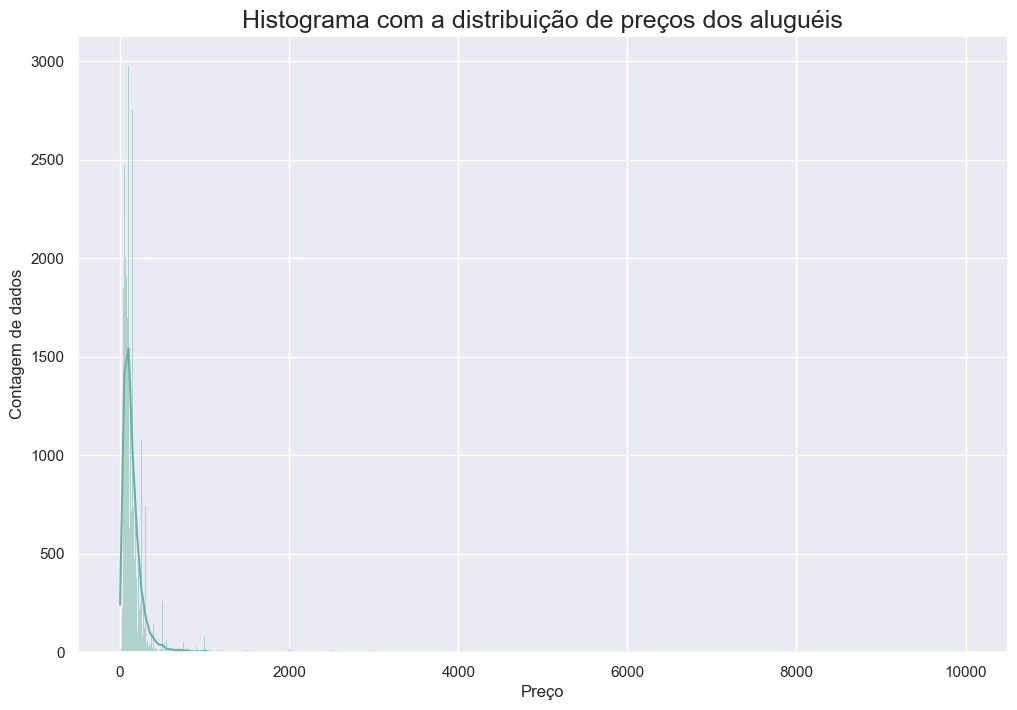

In [22]:
# ajuste do tamanho da figura
plt.figure(figsize = (12,8))

# função de plotagem do gráfico
sns.histplot(
    data = df,
    x = 'price',
    kde = True,
    color = color
)

# título do gráfico
plt.title('Histograma com a distribuição de preços dos aluguéis', fontsize = 18)

# nomeando o eixo X
plt.xlabel('Preço', fontsize = 12)

# nomeando o eixo Y
plt.ylabel('Contagem de dados', fontsize = 12);

Conforme previsto, existem raríssimos casos com preço de aluguel alto. O gráfico também confirma a característica assimétrica dos dados, com uma "cauda" a direita da média, extendendo a curva de densidade. Para melhorar a visualização da área onde existem mais dados, plotou-se abaixo novamente este gráfico mas restringindo o intervalo do preço de aluguel de 0 até 180,00.

In [23]:
# filtrando o dataset para preços de 0 até 180
df_filtrado = df[df['price']<=180]

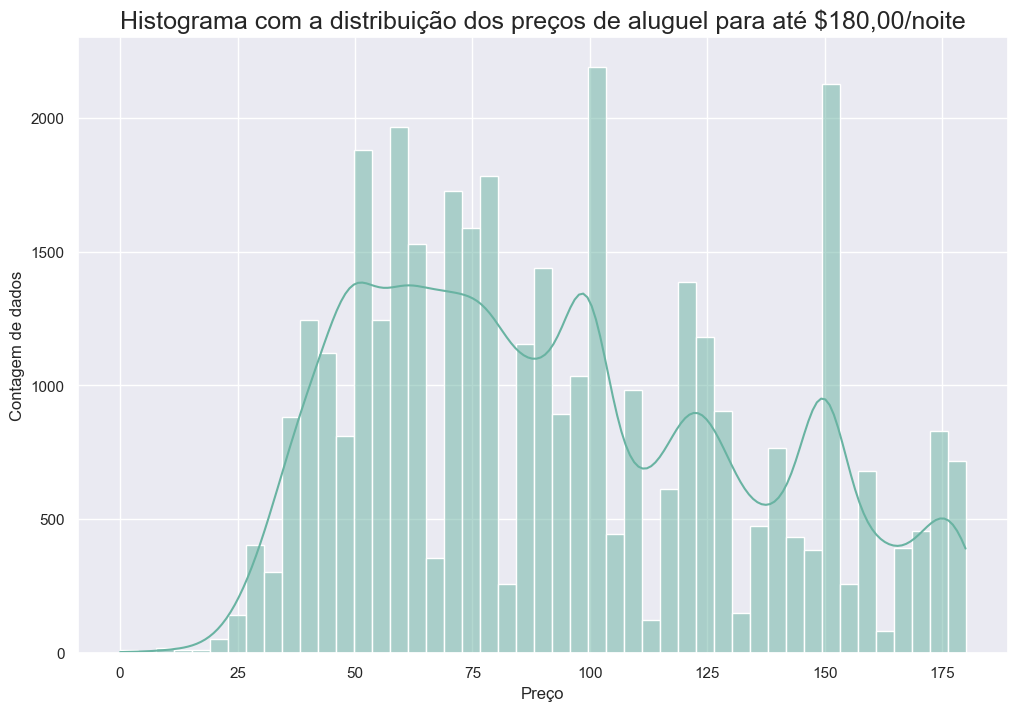

In [24]:
# ajuste do tamanho da figura
plt.figure(figsize = (12,8))

# função de plotagem do gráfico
sns.histplot(
    data = df_filtrado,
    x = 'price',
    kde = True,
    color = color
)

# título do gráfico
plt.title('Histograma com a distribuição dos preços de aluguel para até $180,00/noite', fontsize = 18)

# nomeando o eixo X
plt.xlabel('Preço', fontsize = 12)

# nomeando o eixo Y
plt.ylabel('Contagem de dados', fontsize = 12);

Agora sim tem-se uma visão bem mais clara desta distribuição. Percebe-se que a maior ocorrência de dados está em valores próximos de 100. Importante também destacar a disparada de casos com valores próximos a 150, com uma queda constante na frequência de casos a partir disto.

Em linhas gerais, ao avaliar os dados desta variável objetivo 'price', pode-se afirmar que a maioria dos casos se trata de imóveis com valores bem mais acessíveis, com pouquíssimos casos de imóveis de luxo. Isto confirma diretamente as hipóteses levantadas anteriormente ao avaliar as colunas categóricas, onde existe uma tendência dos anúncios serem voltados para imóveis em regiões com vida noturna mais agitada, ou seja, para pessoas mais jovens, além da grande disponibilidade de aluguéis de quarto privativos, e não apenas do imóvel inteiro (casa ou apartamento).

## Respondendo as perguntas realizadas

a. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

Como a ideia é comprar um apartamento para posteriormente alugá-lo, pode-se estabelecer duas premissas principais para responder esta pergunta de negócio:
- a hospedagem de preferência precisa ser do apartamento/casa inteira, e não somente um quarto privativo ou compartilhado, visto que o interessado pela compra não irá residir neste imóvel, apenas irá alugá-lo para terceiros;
- quanto maior a disponibilidade de dias, mais tempo será possível deixar alugado o imóvel.

Pensando nisso, aplicou-se um filtro no dataset para selecionar apenas os anúncios com imóveis disponíveis para aluguel por completo, e não somente quarto privativo ou compartilhado, e também para aparecer somente os anúncios com disponibilidade 365 dias no ano.

In [25]:
# filtrando o dataset pelo tipo de hospedagem e disponibilidade em dias
df_entire_home_apt = df[(df['room_type']=='Entire home/apt')&(df['disponibilidade_365']==365)]

Feito isso, é possível agrupar os preços médios destes anúncios por bairro, conforme demonstrado a seguir.

In [26]:
# agrupando, no dataset filtrado, o preço médio de aluguel por bairro, exibindo os resultados do menor para o maior
series_bairro = df_entire_home_apt.groupby(by = 'bairro_group')['price'].agg('mean').sort_values(ascending = True)

In [44]:
series_bairro.reset_index()

,bairro_group,price
0,Bronx,124.888889
1,Queens,348.073171
2,Manhattan,437.063291
3,Brooklyn,451.384615
4,Staten Island,495.000000


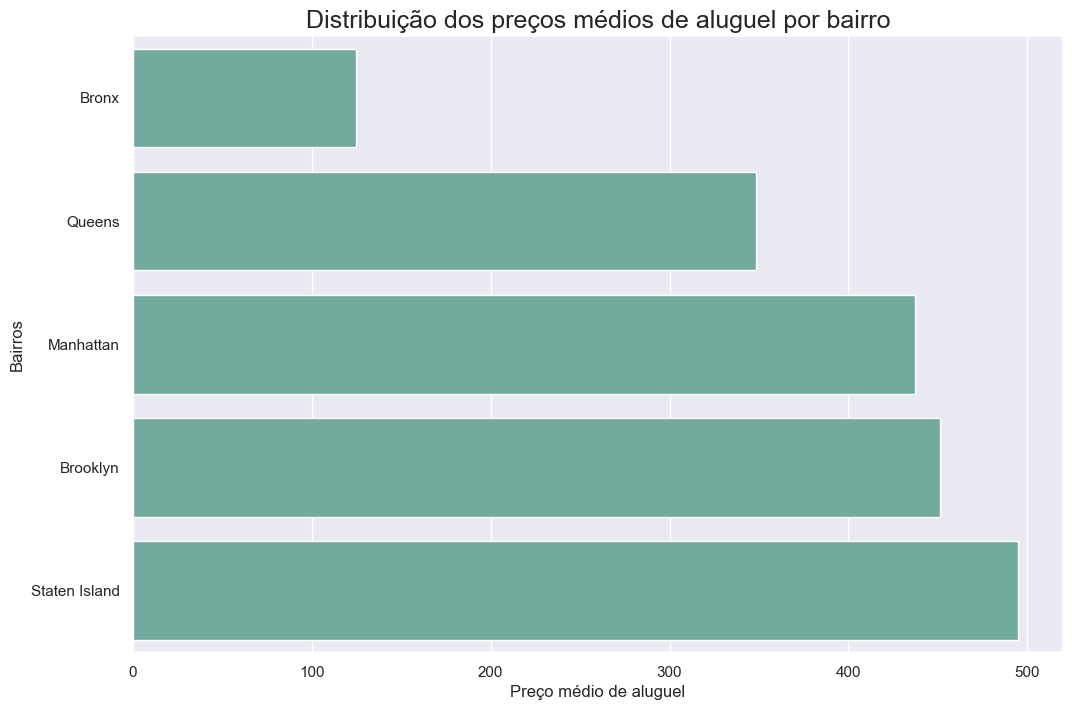

In [61]:
# ajuste do tamanho da figura
plt.figure(figsize = (12,8))

# plotando o gráfico
sns.barplot(
    data = series_bairro.reset_index(),
    y = 'bairro_group',
    x = 'price',
    color = color
)

# título do gráfico
plt.title('Distribuição dos preços médios de aluguel por bairro', fontsize = 18)

# nomeando o eixo Y
plt.ylabel('Bairros', fontsize = 12)

# nomeando o eixo X
plt.xlabel('Preço médio de aluguel', fontsize = 12);

Assim, o lugar mais indicado para a compra é o bairro 'Bronx', pois foi o lugar que, considerando os anúncios que satisfazem as premissas estabelecidas neste problema de negócio, apresentou os preços mais acessíveis. Os possíveis apartamentos foram exibidos abaixo.

In [46]:
df_entire_home_apt[df_entire_home_apt['bairro_group']=='Bronx']

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
260,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,310670,Vie,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,2019-06-27,0.50,13,365
3279,1956677,"The ""Humphrey Bogart""",120623,David,Bronx,Port Morris,40.80844,-73.92889,Entire home/apt,140,30,16,2018-09-26,0.24,1,365
8110,6256470,The Most Affordable 3BR Apartment,17264040,Junior,Bronx,Mount Hope,40.84626,-73.90473,Entire home/apt,105,2,80,2019-06-15,1.66,2,365
14578,11497938,One Bedroom with kids room / office,60501531,John,Bronx,Spuyten Duyvil,40.88058,-73.91812,Entire home/apt,79,186,7,2016-07-30,0.18,1,365
29177,22400368,Forest Houses City Getaway (No Hot Water),158568617,Mandela,Bronx,Longwood,40.82300,-73.90859,Entire home/apt,60,1,104,2019-06-23,5.61,1,365
35912,28522394,The Spot,215277711,Aaron,Bronx,Van Nest,40.83988,-73.86978,Entire home/apt,300,1,0,NaT,NaN,1,365
38537,30314964,Modern NYC 2 Bedroom apt. Close to everything 34a,22641060,Wayne,Bronx,Williamsbridge,40.87821,-73.86354,Entire home/apt,85,30,0,NaT,NaN,1,365
41674,32403617,NEW! Modern 1BR Apartment in Heart of NYC!,79729447,Joe,Bronx,Throgs Neck,40.81490,-73.81545,Entire home/apt,125,3,1,2019-06-09,1.00,1,365
45636,34868325,Airbnb on the Bruckner in the Bronx.,34655986,Curtis,Bronx,Port Morris,40.80464,-73.92575,Entire home/apt,125,14,0,NaT,NaN,1,365


Poderia-se ainda filtrar mais estes resultados, considerando o número de reviews, visto que quanto mais reviews quer dizer que mais vezes o apartamento foi alugado, indicando que os clientes de certa forma avaliam bem este imóvel. E também poderia ser filtrado pelo número mínimo de noites, imaginando um cenário de "fidelização", onde o apartamento ficaria alugado por um bom tempo pelo mesmo cliente.

OBS: a sugestão do filtro pelo número de reviews pode ser avaliada de forma contrária, no sentido de que seria interessante comprar um imóvel com 0 reviews, indicando que provavelmente este imóvel é novo, por isso não recebeu nenhum hóspede até então registrado na plataforma.

b.	O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Para responder esta dúvida de negócio, foi exibida abaixo a matriz de correlação das features numéricas. Exclui-se as colunas 'id' e 'host_id' desta análise pois são somente códigos de identificação, não agregando com informações relevantes.

In [47]:
df.select_dtypes('number').drop(columns = ['id', 'host_id']).corr()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
latitude,1.000000,0.084777,0.033939,0.024861,-0.015399,-0.010168,0.019517,-0.010926
longitude,0.084777,1.000000,-0.150020,-0.062750,0.059092,0.145941,-0.114713,0.082751
price,0.033939,-0.150020,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081833
minimo_noites,0.024861,-0.062750,0.042799,1.000000,-0.080118,-0.121708,0.127960,0.144320
numero_de_reviews,-0.015399,0.059092,-0.047954,-0.080118,1.000000,0.549865,-0.072376,0.172047
reviews_por_mes,-0.010168,0.145941,-0.030608,-0.121708,0.549865,1.000000,-0.009421,0.185835
calculado_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225711
disponibilidade_365,-0.010926,0.082751,0.081833,0.144320,0.172047,0.185835,0.225711,1.000000


Para facilitar a visualização, exibiu-se apenas os dados das variáveis em relação ao 'price',

In [56]:
corr = df.select_dtypes('number').drop(columns = ['id', 'host_id']).corr()

corr['price']

,index,price
0,latitude,0.033939
1,longitude,-0.150020
2,price,1.000000
3,minimo_noites,0.042799
4,numero_de_reviews,-0.047954
5,reviews_por_mes,-0.030608
6,calculado_host_listings_count,0.057472
7,disponibilidade_365,0.081833


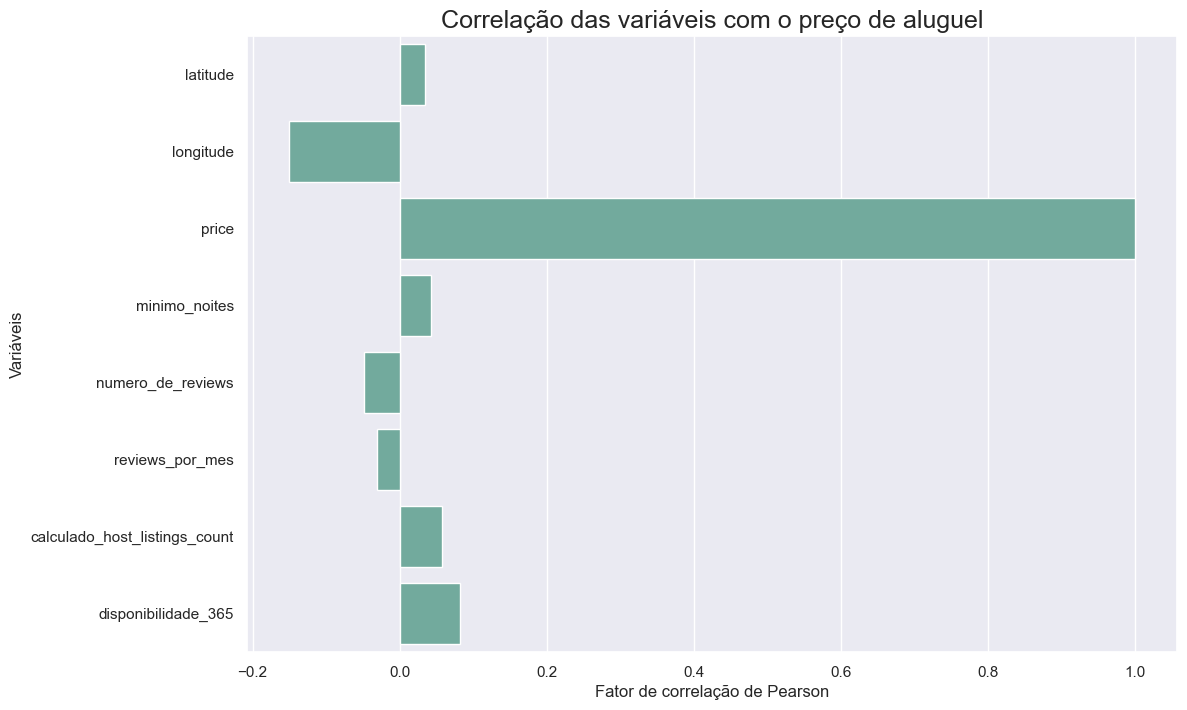

In [62]:
correlacao_price = corr['price'].reset_index()

# ajuste do tamanho da figura
plt.figure(figsize = (12,8))


sns.barplot(
    data = correlacao_price,
    y = 'index',
    x = 'price',
    color = color
)

# título do gráfico
plt.title('Correlação das variáveis com o preço de aluguel', fontsize = 18)

# nomeando o eixo Y
plt.ylabel('Variáveis', fontsize = 12)

# nomeando o eixo X
plt.xlabel('Fator de correlação de Pearson', fontsize = 12);

Pelos resultados acima, as correlações que apresentam maior correlação positiva com o preço são a disponibilidade, com 0.082 e a quantidade de listagem por host, com 0.057. Em seguida vem o número minimo de noites, com 0.043. Número de reviews e reviews por mês apresentaram correalções negativas com o preço, com -0.048 e -0.031 respectivamente.

Avaliando em linhas gerais a matriz de correlação, nenhuma das features apresentou FORTE IMPACTO POSITIVO (diretamente proporcionais, quando uma variável aumenta a outra também aumenta) nem FORTE IMPACTO NEGATIVO (inversamente proporcionais, quando uma diminui a outra também diminui) no preço dos imóveis. Isto pode ser afirmado pois todos os valores da matriz de correlação, em relação ao preço, estão muito próximos de zero, o que indica correlação linear fraca entre as variáveis analisadas.

Para explorar isto mais afundo, utilizou-se outra visualização de dados chamado gráfico de Scatter plot. Aqui nesta sessão, foram utilizadas somente as features de interesse da pergunta de negócio (número mínimo de noites e disponibilidade).

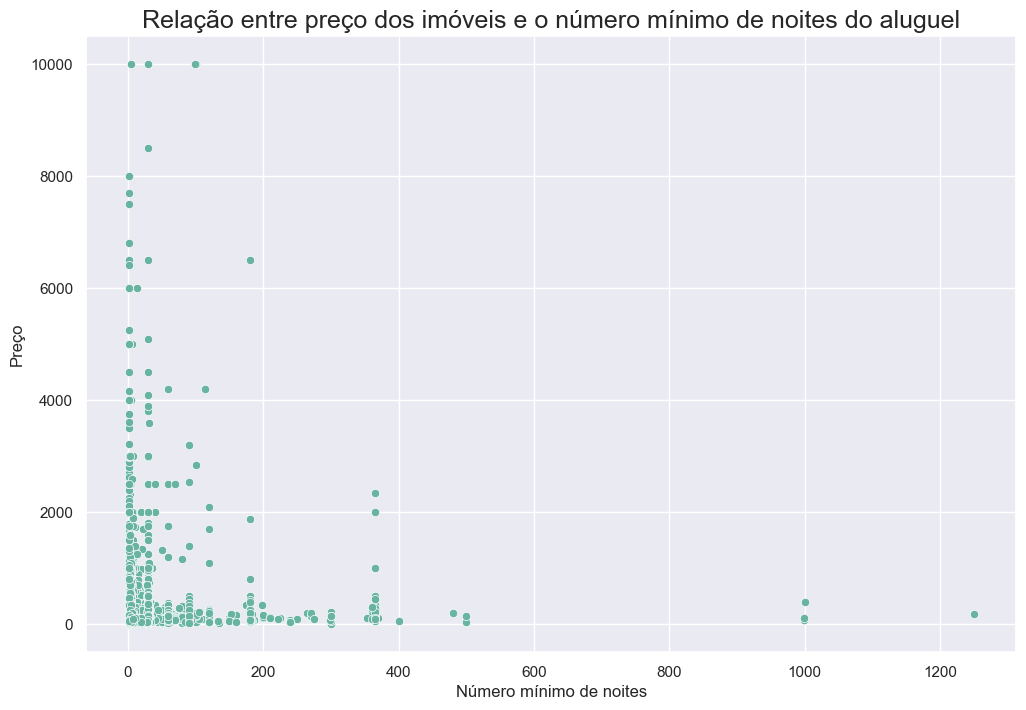

In [63]:
# definindo o tamanho da imagem do gráfico
plt.figure(figsize = (12,8))

# plotando o gráfico
sns.scatterplot(
    data = df,
    y = 'price',
    x = 'minimo_noites',
    color = color
)

# título do gráfico
plt.title('Relação entre preço dos imóveis e o número mínimo de noites do aluguel', fontsize = 18)

# nomeando o eixo X
plt.xlabel('Número mínimo de noites', fontsize = 12)

# nomeando o eixo Y
plt.ylabel('Preço', fontsize = 12);

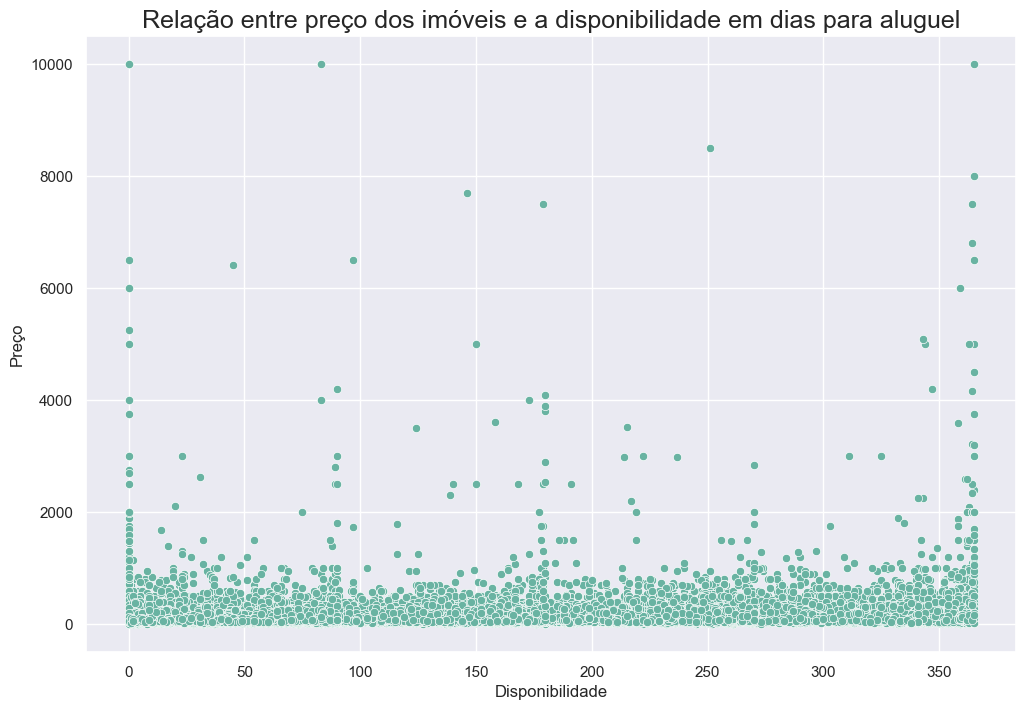

In [64]:
# definindo o tamanho da imagem do gráfico
plt.figure(figsize = (12,8))

# plotando o gráfico
sns.scatterplot(
    data = df,
    y = 'price',
    x = 'disponibilidade_365',
    color = color
)

# título do gráfico
plt.title('Relação entre preço dos imóveis e a disponibilidade em dias para aluguel', fontsize = 18)

# nomeando o eixo X
plt.xlabel('Disponibilidade', fontsize = 12)

# nomeando o eixo Y
plt.ylabel('Preço', fontsize = 12);

Avaliando-se por último estes dois scatter plots, percebe-se uma leve tendência do preço diminuir com o aumento do número mínimo de noites. Contudo para valores pequenos de mínimo de noites, os preços variam muito, não podendo ser observado uma correlação clara entre estas variáveis. Falando agora da disponibilidade, a relação desta feature com o preço fica ainda menos clara, com muitos dados de preço espalhados por todo o gráfico, não ficando claro qual o real impacto e correlação entre ambas, no sentido de quanto maior a disponibilidade maior o preço, ou vice-versa.

Logo, concluí-se que nem o número mínimo de noites nem a disponibilidade interferem de forma clara e direta no preço dos imóveis.

c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Primeiro, filtrou-se os dados com valores de aluguel acima dos 175 dólares/noite (limite dos 75% dos dados conforme visto anteriormente nas estatísticas descritivas do dataset).

In [52]:
df_most_expensive = df[df['price']>175]

Fazendo uma contagem de casos para cada um dos bairros,

In [53]:
df_most_expensive['bairro_group'].value_counts()

bairro_group
Manhattan        8275
Brooklyn         3258
Queens            540
Bronx              62
Staten Island      42
Name: count, dtype: int64

In [66]:
df_most_expensive['bairro_group'].value_counts().reset_index()

,bairro_group,count
0,Manhattan,8275
1,Brooklyn,3258
2,Queens,540
3,Bronx,62
4,Staten Island,42


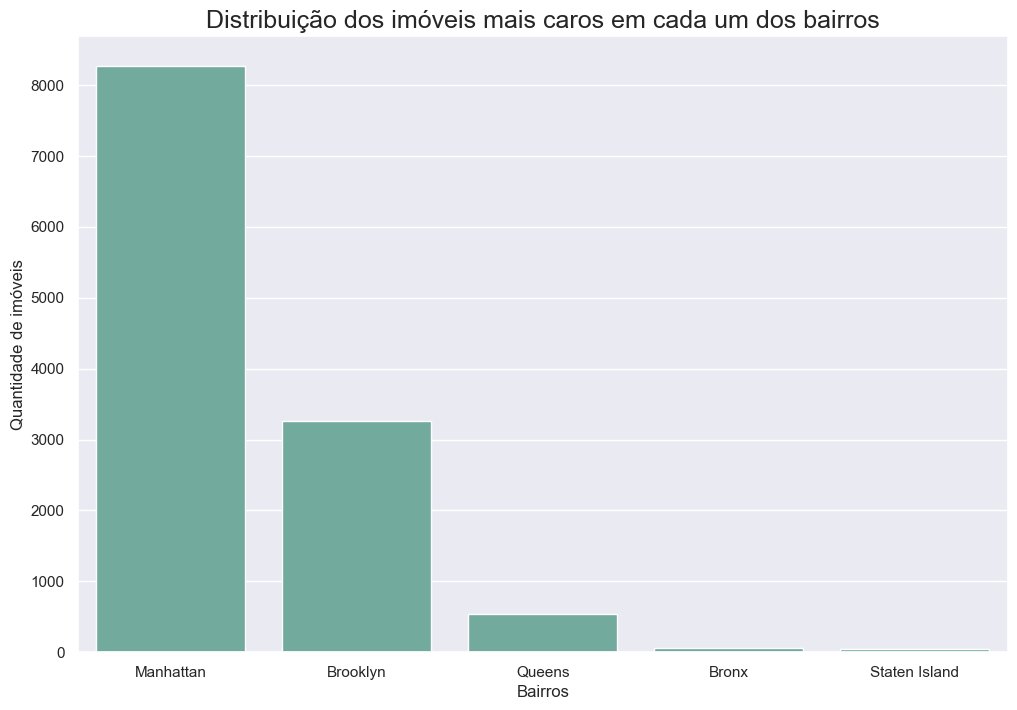

In [69]:
# definindo o tamanho da imagem do gráfico
plt.figure(figsize = (12,8))

# plotando o gráfico
sns.barplot(
    data = df_most_expensive['bairro_group'].value_counts().reset_index(),
    y = 'count',
    x = 'bairro_group',
    color = color
)

# título do gráfico
plt.title('Distribuição dos imóveis mais caros em cada um dos bairros', fontsize = 18)

# nomeando o eixo X
plt.xlabel('Bairros', fontsize = 12)

# nomeando o eixo Y
plt.ylabel('Quantidade de imóveis', fontsize = 12);

Pelo resultado acima, percebe-se que Manhattan tem a maioria dos casos de imóveis com preço acima dos 75% mais baratos do dataset, com 8275 casos, valor este bem acima dos 3258 casos do Brooklyn, segundo colocado na lista.

Para avaliar agora as áreas mais frequentes dentre os imóveis mais caros, exibiu-se abaixo a lista das primeira 20 mais frequentes.

In [54]:
df_most_expensive['bairro'].value_counts().head(20)

bairro
Williamsburg          981
Midtown               964
Hell's Kitchen        914
Upper West Side       741
East Village          686
Chelsea               635
Upper East Side       601
West Village          497
Financial District    459
Bedford-Stuyvesant    375
Harlem                353
Lower East Side       295
Murray Hill           265
Greenpoint            255
Greenwich Village     221
SoHo                  206
Kips Bay              197
Crown Heights         196
East Harlem           188
Park Slope            163
Name: count, dtype: int64

Feito isso, filtrou-se o data frame dos mais caros, fazendo uma contagem de casos apenas das áreas pertencentes a Manhattan, conforme o código que segue,

In [55]:
df_most_expensive[df_most_expensive['bairro_group']=='Manhattan']['bairro'].value_counts()

bairro
Midtown                964
Hell's Kitchen         914
Upper West Side        741
East Village           686
Chelsea                635
Upper East Side        601
West Village           497
Financial District     459
Harlem                 353
Lower East Side        295
Murray Hill            265
Greenwich Village      221
SoHo                   206
Kips Bay               197
East Harlem            188
Gramercy               159
Theater District       159
Tribeca                141
Nolita                 128
Chinatown              104
NoHo                    64
Washington Heights      59
Flatiron District       58
Little Italy            41
Morningside Heights     39
Battery Park City       37
Civic Center            21
Inwood                  16
Two Bridges             10
Roosevelt Island         9
Stuyvesant Town          7
Marble Hill              1
Name: count, dtype: int64

Fazendo comparativo entre as duas listas expostas acima, dentre as 20 áreas mais frequentes dos imóveis mais caros do dataset, 15 pertencem a Manhattan.

Logo, existe sim um padrão frequente no local dos lugares de mais alto valor, este padrão está em Manhattan com a maioria destes casos.